<a href="https://colab.research.google.com/github/amomen1218/python-for-remote-sensing/blob/main/Extracting_spatial_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
# Import modules
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Polygon

<Axes: >

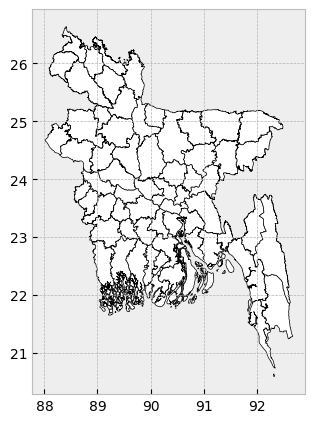

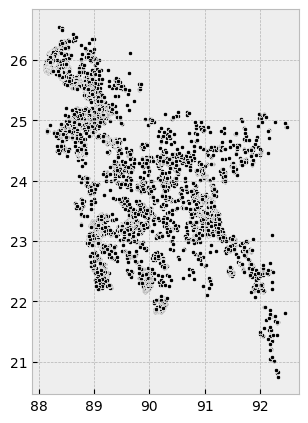

In [172]:
# Load data

# County boundaries
bd_districts = gpd.read_file("/content/drive/MyDrive/python open source spatial programming and remote sensing/bd_districts")

# Ponds locations
ponds = gpd.read_file("/content/drive/MyDrive/python open source spatial programming and remote sensing/bd_ponds")

proj = 4326 # bbox finder is helpul for finding coordinates
counties = bd_districts.to_crs(proj)
ponds = ponds.to_crs(proj)
counties.plot(color='white', edgecolor='black', figsize=(5,5))
ponds.plot(color='black', edgecolor='white', markersize=10, figsize=(5,5))

,Attribute,geometry
0,NAME,"POLYGON ((88.835 24.447, 91.846 24.437, 91.846..."


<Axes: >

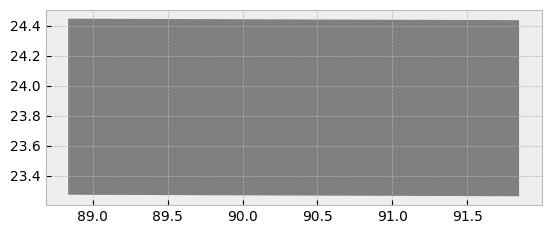

In [173]:
# with the help of bbox finder, we got polygon with lat and long
coordinates = [[88.835449, 24.447150],
              [91.845703, 24.437148],
              [91.845703, 23.261534], [88.835449, 23.2716227]]

# Create a Shapely polygon
poly_shapely = Polygon(coordinates)

# Create a dictionary with needed attributes and required geometry column
attributes_df = {'Attribute': ['NAME'], 'geometry': poly_shapely}

# Convert shapely object to a GeoDataFrame
poly = gpd.GeoDataFrame(attributes_df, geometry = 'geometry', crs = "EPSG:2768")
display(poly)
poly.plot(color='grey')


Text(0.5, 1.0, 'Bangladesh Distict Boundaries and Ponds Distribution')

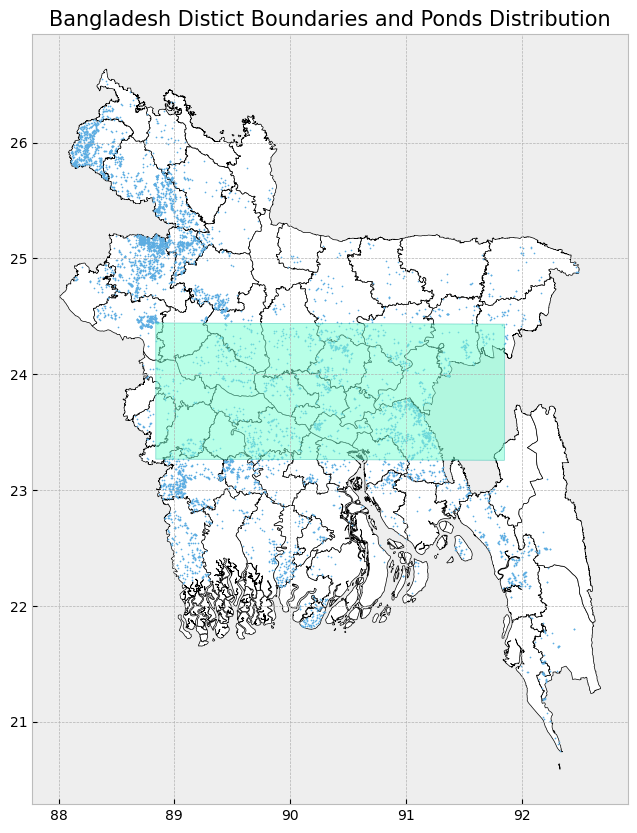

In [175]:
# Create subplots
fig, ax = plt.subplots(1,1 , figsize = (10, 10))

# Plot data
bd_districts.plot(ax = ax, color = 'white', edgecolor = 'black')
ponds.plot(ax = ax, marker = 'o', color = '#5dade2', markersize = 0.5)
poly.plot(ax = ax, color = 'aquamarine', edgecolor = 'lightseagreen', alpha = 0.55)

# Stylize plots
plt.style.use('bmh')

# title
ax.set_title('Bangladesh Distict Boundaries and Ponds Distribution', fontdict = {'fontsize': '15', 'fontweight' : '3'})

In [145]:
# Clip data
clip_counties = gpd.clip(counties, poly)

# Display attribute table
display(clip_counties)

<ipython-input-145-34897aa55c74>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:2768

  clip_counties = gpd.clip(counties, poly)


,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,ValidTo,geometry
15,2.949855,0.079876,Feni,BD2030,None,None,None,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,0000/00/00,"MULTIPOLYGON (((91.40933 23.28435, 91.40954 23..."
25,3.707490,0.251809,Khagrachhari,BD2046,None,None,None,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,0000/00/00,"POLYGON ((91.77535 23.26186, 91.77535 23.26197..."
7,4.332182,0.129682,Chandpur,BD2013,None,None,None,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,0000/00/00,"MULTIPOLYGON (((90.62826 23.26563, 90.62764 23..."
18,2.711754,0.130094,Gopalganj,BD3035,None,None,None,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,0000/00/00,"POLYGON ((89.95422 23.36034, 89.95424 23.36033..."
40,2.147471,0.087785,Narail,BD4065,None,None,None,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,0000/00/00,"POLYGON ((89.57913 23.32283, 89.57923 23.32283..."
57,2.496904,0.104665,Shariatpur,BD3086,None,None,None,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,0000/00/00,"MULTIPOLYGON (((90.51965 23.31765, 90.51855 23..."
32,2.515501,0.100150,Madaripur,BD3054,None,None,None,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,0000/00/00,"POLYGON ((90.18235 23.49796, 90.18256 23.49783..."
21,4.349627,0.227821,Jessore,BD4041,None,None,None,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,0000/00/00,"POLYGON ((89.03088 23.37449, 89.03092 23.37448..."
33,1.940498,0.092672,Magura,BD4055,None,None,None,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,0000/00/00,"POLYGON ((89.43037 23.66467, 89.43052 23.6646,..."
23,3.658080,0.172906,Jhenaidah,BD4044,None,None,None,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,0000/00/00,"POLYGON ((89.06879 23.77147, 89.06886 23.77157..."


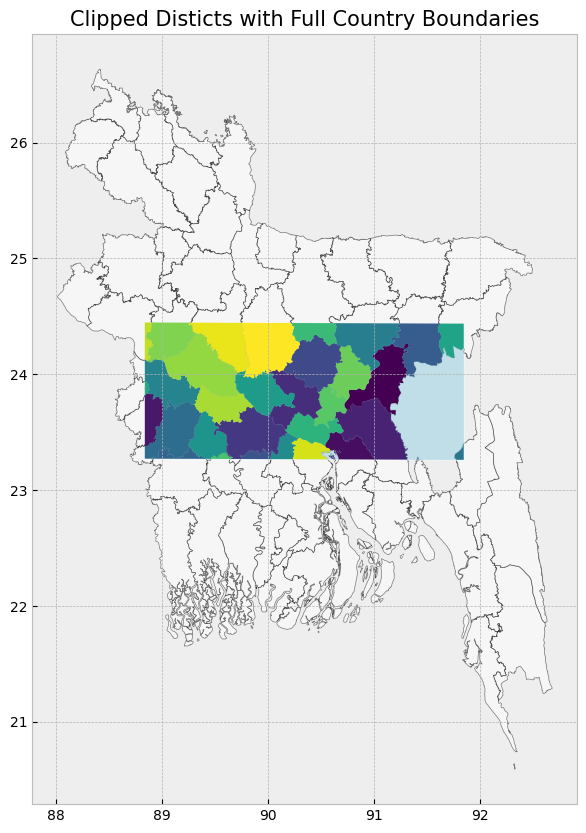

In [176]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

bd_districts.plot(ax=ax, color='white', edgecolor='black', alpha=0.5)
poly.plot(ax=ax, color='lightblue', edgecolor='white', alpha=0.7)  # Clipping area

clip_counties.plot(ax=ax,column='ADM2_EN', cmap='viridis', legend=False) #using atrribute table for different color palaette

# Stylize and add title
plt.style.use('bmh')
ax.set_title('Clipped Disticts with Full Country Boundaries', fontdict={'fontsize': '15', 'fontweight': '3'})
plt.show()

<ipython-input-177-8a1b0e686d05>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:2768

  clip_ponds = gpd.clip(ponds, poly)


,TYPE,Division,District,Upazila,FType,geometry
1622,335,Dhaka,Gopalgan,MUKSUDPU,Tank/pond,POINT (89.89042 23.26813)
1613,335,Dhaka,Gopalgan,MUKSUDPU,Tank/pond,POINT (89.84454 23.27063)
833,335,Chittagong,Comilla,Comilla Sadar Dakshin,Tank/pond,POINT (91.13479 23.26601)
832,335,Chittagong,Comilla,Comilla Sadar Dakshin,Tank/pond,POINT (91.13625 23.26861)
761,335,Chittagong,Comilla,CHOUDDGRAM,Tank/pond,POINT (91.26195 23.27561)
...,...,...,...,...,...,...
6401,335,Sylhet,Habiganj,habiganj Sadar,Tank/pond,POINT (91.44657 24.36738)
6480,335,Sylhet,Moulvibazar,SRIMONGA,Tank/pond,POINT (91.64679 24.37793)
6479,335,Sylhet,Moulvibazar,SRIMONGA,Tank/pond,POINT (91.63916 24.3794)
6478,335,Sylhet,Moulvibazar,SRIMONGA,Tank/pond,POINT (91.63554 24.38186)


<Axes: >

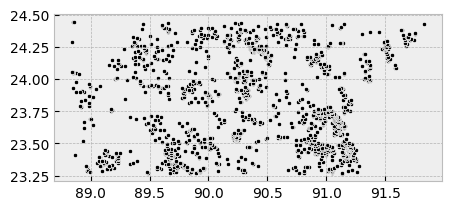

In [177]:
clip_ponds = gpd.clip(ponds, poly)
display(clip_ponds)
clip_ponds.plot(color='black', edgecolor='white', markersize=10, figsize=(5,5))


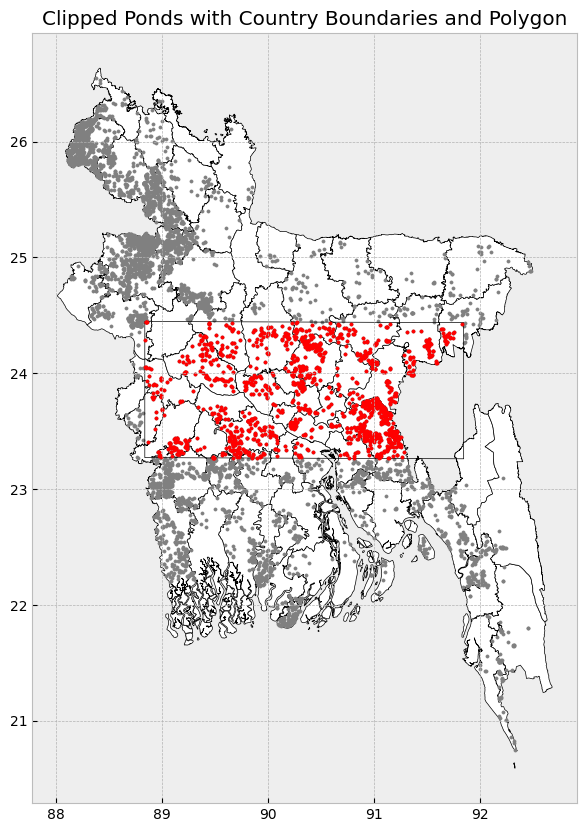

In [178]:
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the counties,pond and poly
bd_districts.plot(ax=ax, color='white', edgecolor='black')
ponds.plot(ax=ax, marker='o', color='grey', markersize=5)
poly.plot(ax=ax, color='none', edgecolor='black', alpha=1)

clip_ponds.plot(ax=ax, marker='o', color='red', markersize=5)

ax.set_title('Clipped Ponds with Country Boundaries and Polygon')
plt.show()